In [1]:
!pip install kagglehub

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 6, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("open-powerlifting/powerlifting-database")

print("Path to dataset files:", path)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 7, Finished, Available, Finished)

Path to dataset files: /home/trusted-service-user/.cache/kagglehub/datasets/open-powerlifting/powerlifting-database/versions/2


 93%|█████████▎| 163M/176M [00:09<00:00, 27.1MB/s] 


In [4]:
dataset = "/home/trusted-service-user/.cache/kagglehub/datasets/open-powerlifting/powerlifting-database/versions/2/openpowerlifting-2024-01-06-4c732975.csv"


StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 9, Finished, Available, Finished)

In [5]:
import pandas as pd
# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(dataset)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 10, Finished, Available, Finished)

/tmp/ipykernel_7726/728937012.py:3: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset)


In [20]:
# Limit to 3000 instances
df = df.sample(n=3000, random_state=42)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 25, Finished, Available, Finished)

In [21]:
print(df.columns.tolist())
print(len(df.columns.tolist()))

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 26, Finished, Available, Finished)

['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift', 'Tested', 'Country', 'State', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName']
41


In [43]:
print(df.dtypes)


StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 5, 48, Finished, Available, Finished)

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [22]:
df.head

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 27, Finished, Available, Finished)

<bound method NDFrame.head of                          Name  Sex Event Equipment   Age  AgeClass  \
1784673    Matthew Jackson #4    1   SBD       Raw  31.0         4   
640850       Simone Nascivera    1   SBD       Raw  21.5         3   
2155507           Cait Suttie    0   SBD       Raw  32.0         4   
520765        Blanca Guerrero    0   SBD       Raw  22.5         3   
546305      Mauricio De Rosso    1   SBD       Raw  39.5         5   
...                       ...  ...   ...       ...   ...       ...   
1150187        Farris Collins    1   SBD       Raw  21.0         3   
725951        Marie Tomečková    0   SBD     Wraps  24.0         4   
2454450           Dave Keetch    1   SBD     Wraps  39.0         5   
2128797      Jonathan Apodaca    1   SBD       Raw  18.0         2   
1773611  Josephine Klingshirn    0   SBD       Raw  22.0         3   

        BirthYearClass       Division  BodyweightKg  WeightClassKg  ...  \
1784673          24-39       M_OR_WPC         90.80   

In [45]:
!pip install category_encoders

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 6, 50, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 15.6 MB/s eta 0:00:00


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 28, Finished, Available, Finished)

In [24]:
# Select features and target
features = [
    'Sex', 'Age', 'AgeClass', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
    'Bench1Kg', 'Bench2Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 
    'Dots', 'Wilks', 'Country'
]
target = 'Place'

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 29, Finished, Available, Finished)

In [25]:
df.dropna(subset=features + [target], inplace=True)


StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 30, Finished, Available, Finished)

In [26]:
# Encode categorical features using LabelEncoder (for simplicity here)
label_encoder = LabelEncoder()

# Encoding categorical features
categorical_features = ['Sex', 'AgeClass', 'WeightClassKg', 'Place', 'Country']
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 31, Finished, Available, Finished)

In [27]:
# Separate features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 32, Finished, Available, Finished)

In [28]:
# Scale numerical features (Optional, improves performance)
scaler = StandardScaler()
numerical_features = ['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg', 'Bench1Kg', 
                      'Bench2Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Best3DeadliftKg', 'TotalKg', 
                      'Dots', 'Wilks']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 33, Finished, Available, Finished)

In [29]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 34, Finished, Available, Finished)

GaussianNB()

In [30]:
# Predict on test set
y_pred = nb_model.predict(X_test)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 35, Finished, Available, Finished)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 36, Finished, Available, Finished)

Accuracy: 97.50%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      1.00      0.00         0
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      0.00      0.00         1
          12       0.99      1.00      1.00       104
          17       0.00      1.00      0.00         0
          18       1.00      0.00      0.00         1
          20       1.00      0.00      0.00         1
          21       0.91      1.00      0.95        42
          22       1.00      0.00      0

In [32]:
print(y.value_counts())  # Check the distribution of 'Place' in the dataset
print(y_train.value_counts())  # Check the distribution in the training set
print(y_test.value_counts())

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 37, Finished, Available, Finished)

0     1553
12     503
21     282
28     185
33     110
36      90
38      49
40      43
39      36
1       32
4       16
2       13
5       11
6       10
8        9
7        7
10       6
9        5
41       5
23       2
17       2
26       2
31       2
14       2
20       2
16       2
29       2
13       2
32       2
15       2
11       2
25       1
19       1
3        1
18       1
37       1
30       1
34       1
24       1
35       1
22       1
27       1
Name: Place, dtype: int64
0     1238
12     399
21     240
28     147
33      96
36      70
38      37
40      36
39      24
1       22
4       14
2       12
8        9
6        9
5        8
7        6
9        3
41       3
10       3
17       2
26       2
16       2
14       2
15       2
31       2
13       2
29       1
34       1
32       1
19       1
11       1
20       1
24       1
37       1
25       1
3        1
Name: Place, dtype: int64
0     315
12    104
21     42
28     38
36     20
33     14
38     12
39     12
1      10


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 23, Finished, Available, Finished)

StatementMeta(551e7de1-28a3-4597-87eb-077d1778d47f, 7, 24, Finished, Available, Finished)

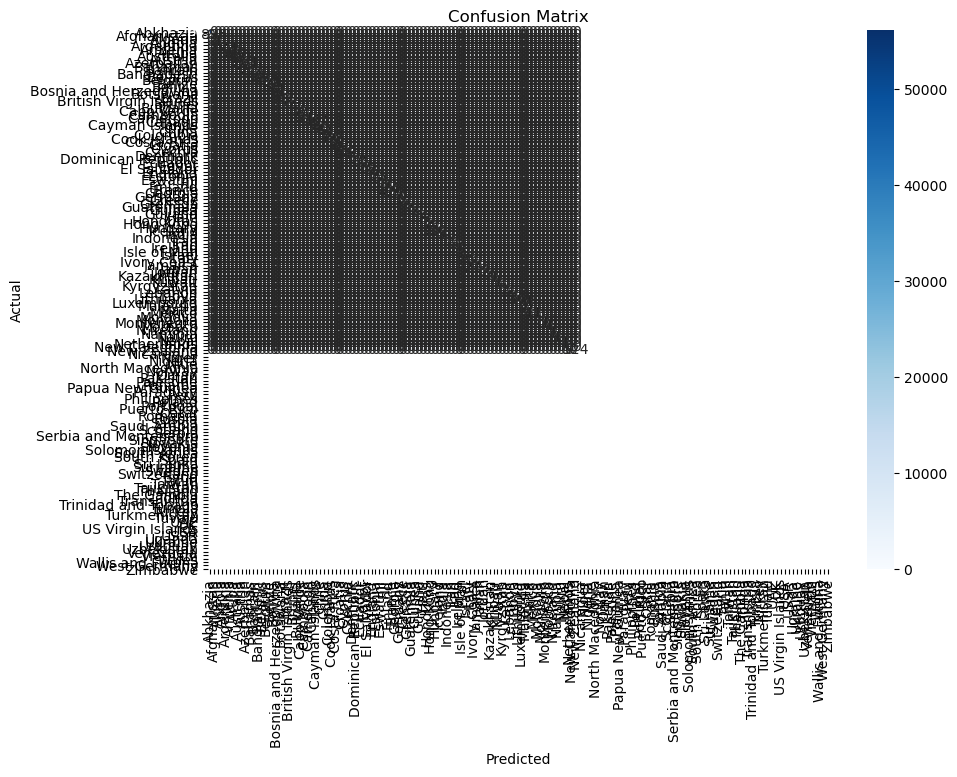

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()